# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [54]:
### Use python, pandas or numpy methods rather than hard coding the results


#Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)


# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [9]:

#print (X_train.shape) output= (34799, 32, 32, 3)
#print (X_train.shape[0]) output= (34799)
#print (X_train.shape[1]) output= (32)
#print (X_train.shape[2]) #output= (32)
#print (X_train.shape[3]) #output= (3)
#print (X_train.dtype) output = (uint8)

uint8


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Random sample images:


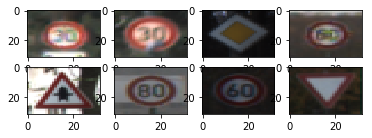

In [4]:

### Data exploration visualization
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
print('Random sample images:')
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[randint(0,34000)],aspect='auto')

[]

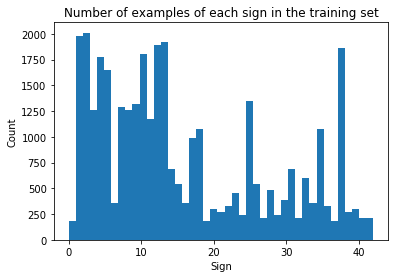

In [5]:

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

In [6]:
#Comparing distribution of class across training & test set
import collections
import pandas as pd
train_dist = collections.Counter(y_train)
test_dist = collections.Counter(y_test)
train_dist = pd.DataFrame.from_dict(train_dist,orient = 'index').reset_index()
test_dist = pd.DataFrame.from_dict(test_dist,orient = 'index').reset_index()
train_dist.columns = ['ClassId', 'Train_Count']
test_dist.columns = ['ClassId', 'test_Count']
train_dist['Train_Percent'] = 100*train_dist['Train_Count']/train_dist.Train_Count.sum()
test_dist['test_Percent'] = 100*test_dist['test_Count']/test_dist.test_Count.sum()
train_test_dist = pd.merge(train_dist,test_dist, on = 'ClassId', how = 'outer')
train_test_dist['Dist_Difference'] = train_test_dist.Train_Percent - train_test_dist.test_Percent

In [7]:
train_test_dist

,ClassId,Train_Count,Train_Percent,test_Count,test_Percent,Dist_Difference
0,0,180,0.517256,60,0.475059,0.042197
1,1,1980,5.689819,720,5.700713,-0.010894
2,2,2010,5.776028,750,5.938242,-0.162214
3,3,1260,3.620794,450,3.562945,0.057848
4,4,1770,5.086353,660,5.225653,-0.139300
5,5,1650,4.741516,630,4.988124,-0.246608
6,6,360,1.034512,150,1.187648,-0.153136
7,7,1290,3.707003,450,3.562945,0.144058
8,8,1260,3.620794,450,3.562945,0.057848
9,9,1320,3.793212,480,3.800475,-0.007263


In [144]:
# Generate Fake Images Data. 
#This significantly reduced the accuracy of the model so I'm not including in the fake data in the training set

'''
def transform_image(img,ang_range,shear_range,trans_range):
    
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

import random
for i in range(1,len(set(y_train))):
    print (i)
    indexes= list(np.where(y_train == i))[0]
    num_images = train_test_dist[train_test_dist.ClassId == i].Train_Count[i]
    for j in range(num_images, 3000):
        if j%1000 == 0:
            print (j)
        img = X_train[random.choice(indexes)]
        transformed_image = transform_image(img,20,20,5).reshape(1,32,32,3)
        X_train = np.vstack([X_train,transformed_image])
        y_train = np.append(y_train, i)
'''

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# Save original set 
X_train_raw = X_train
X_test_raw = X_test
X_valid_raw = X_valid

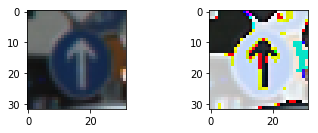

In [10]:
import numpy as np

# Normalise input (images still in colour)
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
X_valid = (X_valid - X_valid.mean()) / (np.max(X_valid) - np.min(X_valid))

"""Plots original image on the left and normalised image on the right."""
random_image = randint(0,30000)
plt.subplot(2,2,1)
plt.imshow(X_train_raw[random_image])
plt.subplot(2,2,2)
plt.imshow(X_train[random_image])

### Model Architecture

In [ ]:

from sklearn.utils import shuffle
#from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

encoder = preprocessing.LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)
y_valid_onehot = encoder.fit_transform(y_valid)

In [47]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #new_height = (input_height - filter_height + 2 * P)/S + 1
    #new_width = (input_width - filter_width + 2 * P)/S + 1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3 . Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #new_height = (input_height - filter_height)/S + 1
    #new_width = (input_width - filter_width)/S + 1

    # SOLUTION: Pooling. Input = 28x28x10. Output = (26x26x10) 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    ## Temp Layer in Le Net 26x26x10 , Output :24x24x15
    conv1_temp_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 10, 15), mean = mu, stddev = sigma))
    conv1_temp_b = tf.Variable(tf.zeros(15))
    conv1_temp = tf.nn.conv2d(conv1, conv1_temp_W,strides= [1,1,1,1], padding = 'VALID') + conv1_temp_b    
    conv1_temp = tf.nn.relu(conv1_temp)
    
    # Pooling : Input: 24x24x15, Output : 12x12x15
    conv1_temp = tf.nn.max_pool(conv1_temp, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # SOLUTION: Layer 2:  Input : 12x12x15 , Convolutional. Output = 10x10x30. 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 15, 30), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(30))
    conv2   = tf.nn.conv2d(conv1_temp, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x30. Output = 5x5x30.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x30. Output = 750.
    fc0   = flatten(conv2)
    
    # Adding another fully connected layer 750 -> 800
    fc00_W = tf.Variable(tf.truncated_normal(shape=(750, 800), mean = mu, stddev = sigma))
    fc00_b = tf.Variable(tf.zeros(800))
    fc00   = tf.matmul(fc0, fc00_W) + fc00_b
    fc00 = tf.nn.relu(fc00)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc00, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 200.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 200. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [48]:
# NN parameters
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

In [49]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value=1., off_value=0., axis=-1)

In [50]:

# Run LeNet
import timeit
start_time = timeit.default_timer()

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Performance metrics
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y_rawlabels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [51]:
start_time = timeit.default_timer()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y_rawlabels: batch_y})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

elapsed = timeit.default_timer() - start_time
print (elapsed)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Train Accuracy = 0.953
Validation Accuracy = 0.862

EPOCH 2 ...
Train Accuracy = 0.987
Validation Accuracy = 0.916

EPOCH 3 ...
Train Accuracy = 0.993
Validation Accuracy = 0.935

EPOCH 4 ...
Train Accuracy = 0.991
Validation Accuracy = 0.929

EPOCH 5 ...
Train Accuracy = 0.997
Validation Accuracy = 0.936

EPOCH 6 ...
Train Accuracy = 0.994
Validation Accuracy = 0.939

EPOCH 7 ...
Train Accuracy = 0.998
Validation Accuracy = 0.947

EPOCH 8 ...
Train Accuracy = 0.995
Validation Accuracy = 0.941

EPOCH 9 ...
Train Accuracy = 0.994
Validation Accuracy = 0.937

EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.931

EPOCH 11 ...
Train Accuracy = 0.999
Validation Accuracy = 0.948

EPOCH 12 ...
Train Accuracy = 0.986
Validation Accuracy = 0.925

EPOCH 13 ...
Train Accuracy = 0.998
Validation Accuracy = 0.942

EPOCH 14 ...
Train Accuracy = 0.995
Validation Accuracy = 0.943

EPOCH 15 ...

In [52]:
with tf.Session() as sess:
    #loader = tf.train.import_meta_graph('lenet_trafficSigns.meta')
    #loader.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print ("Model Restored")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model Restored
Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

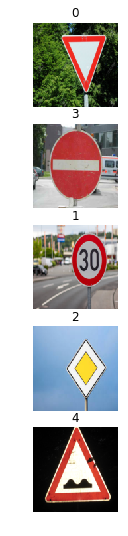

In [45]:
import os
import scipy.misc

NEW_IMAGES_FOLDER = './test_images/'


def resize_image(image_file):
    image = plt.imread(NEW_IMAGES_FOLDER + image_file)
    return scipy.misc.imresize(image, (128, 128))

resized_image_data = [(resize_image(image), image[:-4]) 
                          for image in os.listdir(NEW_IMAGES_FOLDER)]

def display_images(imgs_data):
    index = 1
    plt.figure(figsize=(4,9))
    for img, name in imgs_data:
        plt.subplot(5, 1, index)
        plt.imshow(img)
        plt.axis('off')
        plt.title(name)
        index += 1
    plt.show()
    
display_images(resized_image_data)

## Predict the Sign Type for Each Image and analyze performance
### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

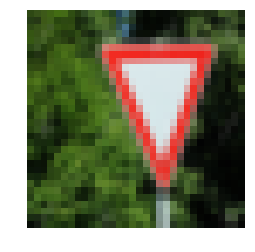

CNN Prediction:  ['Yield'] (13)
Top Results:  [[ 1.  0.  0.  0.  0.]]
Top Indices:  [[13  0  1  2  3]]


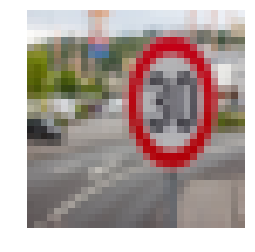

CNN Prediction:  ['Speed limit (30km/h)'] (1)
Top Results:  [[ 1.  0.  0.  0.  0.]]
Top Indices:  [[1 0 2 3 4]]


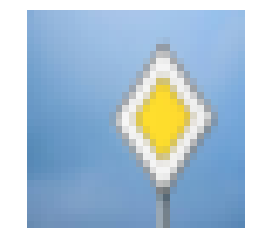

CNN Prediction:  ['Priority road'] (12)
Top Results:  [[ 1.  0.  0.  0.  0.]]
Top Indices:  [[12  0  1  2  3]]


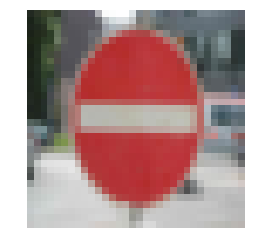

CNN Prediction:  ['No entry'] (17)
Top Results:  [[ 1.  0.  0.  0.  0.]]
Top Indices:  [[17  0  1  2  3]]


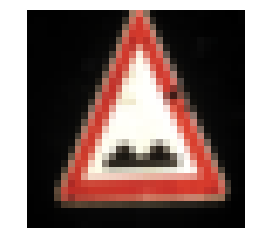

CNN Prediction:  ['Bumpy road'] (22)
Top Results:  [[ 1.  0.  0.  0.  0.]]
Top Indices:  [[22  0  1  2  3]]


In [53]:
import os
import scipy.misc

import csv
reader = csv.reader(open('signnames.csv'))

result = {}
for row in reader:
    key = row[0]
    if key in result:
        
        pass
    result[key] = row[1:]

NEW_IMAGES_FOLDER = './test_images/'

labels = {0: 'Yield',
          1: 'Speed limit (30 km/h)',
          2: 'Priority road',
          3: 'No entry',
          4: 'Bumpy road'}

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(5):
        image = plt.imread(NEW_IMAGES_FOLDER + str(i)+'.jpg')
        image = scipy.misc.imresize(image, (32, 32))
        
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
        classification = sess.run(tf.argmax(logits, 1), feed_dict={x: [image]})
        softmax = tf.nn.softmax(logits)        
        normalized_prob = sess.run(softmax, feed_dict={x: [image]})
        top_k_op = tf.nn.top_k(normalized_prob, k=5)
        top_k_results = sess.run(top_k_op)
        
        print('CNN Prediction: ', result[str(classification[0])], '('+str(classification[0])+')')
        print('Top Results: ', top_k_results.values)
        print('Top Indices: ', top_k_results.indices)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 